# Jupyter Notebook Tutorial

Jupyter notebooks are great for writing Python interactively and visualizing results. In addition to Python, jupyter notebooks can render markdown (even with LaTeX! $f'(x) = 2x$).

To execute Python, write something in a code "cell" and press shift-enter:

In [1]:
2 + 2

4

The notebook will automatically display the string representation of the last value entered:

In [2]:
a = 2
b = a * 3
a**2 - b

-2

## Creating Plots

Jupyter notebooks are so cool because you can display plots created with code inline. The most popular library for plotting in library is matplotlib.

To get started with matplotlib, you need to import it:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

It's also useful to import numpy for working with arrays:

In [4]:
import numpy as np

Here's a basic example that graphs points along a sine wave:

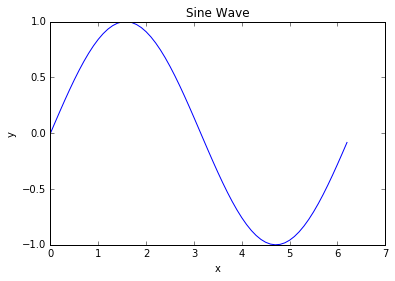

In [5]:
x = np.arange(0, 2*np.pi, 0.1) # create an array of number from 0 to 2pi, 0.1 interval
y = np.sin(x) # apply sin function to each x value

plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)

### More plotting

Here's an example that shows the histograms of some random distributions:

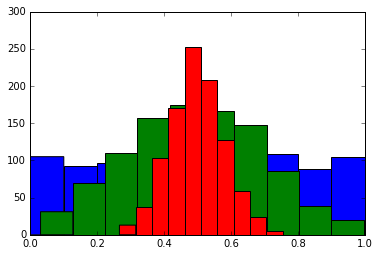

In [6]:
for times in [1, 2, 12]:
    vals = np.random.rand(1000)
    for i in range(1, times):
        vals += np.random.rand(1000)
    vals /= times
    plt.hist(vals)

### Even more plotting

You can even do 3D stuff:

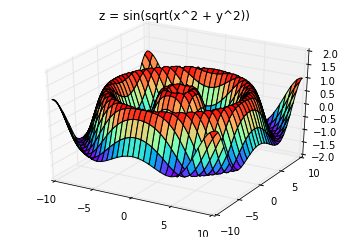

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(-10, 10, 300)
Y = np.linspace(-10, 10, 300)
X_grid, Y_grid = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X_grid**2 + Y_grid**2))
ax.plot_surface(X_grid, Y_grid, Z, cmap='rainbow')
ax.set_zlim(-2, 2)
plt.title('z = sin(sqrt(x^2 + y^2))')

## OpenCV with jupyter notebooks

Using OpenCV in jupyter notebooks is a great way to quickly prototype and experiment with computer vision. Because OpenCV seamlessly integrates with matplotlib and numpy, it's simple to use in Python:

In [8]:
import cv2 # import opencv library

# load image as a numpy array
img = cv2.imread("img/flower.jpg", cv2.IMREAD_COLOR)
img.shape

(426, 640, 3)

The OpenCV Python bindings automatically load images as numpy arrays. The shape of the image loaded above is `(426, 640, 3)`, which means that the image is 640x426 and has 3 color channels.

To display the image, use `plt.imshow`. (Note that OpenCV loads images in BGR format. Matplotlib expect RGB images so conversion is needed)

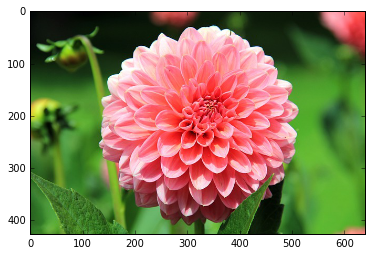

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

It's easy to manipulate images now. Here's an example of copying a patch of the image to another location:

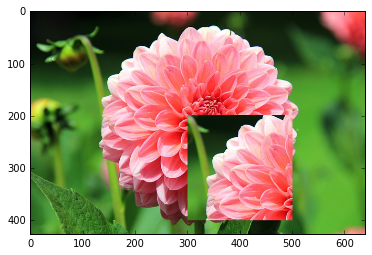

In [10]:
manipulated = img.copy()
manipulated[200:400,300:500,:] = manipulated[50:250,100:300,:]
plt.imshow(cv2.cvtColor(manipulated, cv2.COLOR_BGR2RGB))

Here's an example applying box blur to an image:

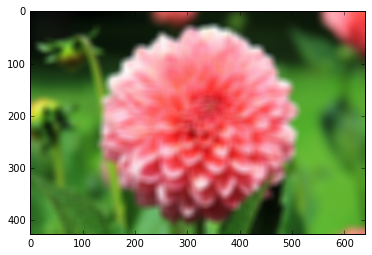

In [16]:
kernel = np.ones((15, 15)) / 15**2
blurred = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))